In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv ("drivers.csv") #Subo los datos de conductores

In [3]:
df1 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
859,861,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto
860,862,doohan,61,DOO,Jack,Doohan,2003-01-20,Australian,http://en.wikipedia.org/wiki/Jack_Doohan
861,863,antonelli,12,ANT,Andrea Kimi,Antonelli,2006-08-25,Italian,https://en.wikipedia.org/wiki/Andrea_Kimi_Anto...
862,864,bortoleto,5,BOR,Gabriel,Bortoleto,2004-10-14,Brazilian,https://en.wikipedia.org/wiki/Gabriel_Bortoleto


In [4]:
df2=pd.read_csv("driver_standings.csv") # Subo los datos de las posiciones de los pilotos

In [5]:
df2

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
35209,73617,1161,852,20.0,17,17,0
35210,73618,1161,864,18.0,18,18,0
35211,73619,1161,860,16.0,19,19,0
35212,73620,1161,861,0.0,20,20,0


In [6]:
# Imprimo las columnas de los dos set de datos, para ver que claves se repiten entre ellas.
print(df1.columns)
print(df2.columns)

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')


In [7]:
# Unir los dos dataframes por la columna clave
df_unido = pd.merge(df1, df2, on="driverId", how="inner")

In [8]:
df_unido.sample(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driverStandingsId,raceId,points,position,positionText,wins
21916,347,bonnier,\N,\N,Jo,Bonnier,1930-01-31,Swedish,http://en.wikipedia.org/wiki/Joakim_Bonnier,52565,681,0.0,24,24,0
28767,631,andrews,\N,\N,Keith,Andrews,1920-06-15,American,http://en.wikipedia.org/wiki/Keith_Andrews_(dr...,46791,789,0.0,70,70,0
30506,771,walt_brown,\N,\N,Walt,Brown,1911-12-30,American,http://en.wikipedia.org/wiki/Walt_Brown_(auto_...,43742,827,0.0,50,50,0
17168,221,depailler,\N,\N,Patrick,Depailler,1944-08-09,French,http://en.wikipedia.org/wiki/Patrick_Depailler,57485,537,26.0,5,5,1
21683,341,surtees,\N,\N,John,Surtees,1934-02-11,British,http://en.wikipedia.org/wiki/John_Surtees,63678,728,22.0,4,4,1


In [9]:
del df_unido ["url"]
del df_unido ["driverRef"]
del df_unido ["driverStandingsId"]
del df_unido ["raceId"]
del df_unido ["positionText"]

In [10]:
headers = ["driverId", "Numero", "Codigo" , "Nombre", "Apellido", "Nacimiento", "Nacionalidad", "Puntos" , "Posicion" , "Victorias"]
df_unido.columns = headers

In [11]:
df_unido.sample(5)

,driverId,Numero,Codigo,Nombre,Apellido,Nacimiento,Nacionalidad,Puntos,Posicion,Victorias
30767,807,27,HUL,Nico,Hülkenberg,1987-08-19,German,17.0,14,0
9710,102,\N,\N,Ayrton,Senna,1960-03-21,Brazilian,27.0,2,3
23631,403,\N,\N,Phil,Hill,1927-04-20,American,15.0,3,1
30631,788,\N,\N,Joe,Fry,1915-10-26,British,0.0,40,0
26938,541,\N,\N,Ron,Flockhart,1923-06-16,British,0.0,21,0


In [12]:
df_unido.dtypes

driverId          int64
Numero           object
Codigo           object
Nombre           object
Apellido         object
Nacimiento       object
Nacionalidad     object
Puntos          float64
Posicion         object
Victorias         int64
dtype: object

In [13]:
# Chequeo sobre si hay valores nulos
check_for_nan = df_unido.isnull().values.any()
print (check_for_nan)

False


In [14]:
# Nacionalidades mas frecuentes
df_unido.Nacionalidad.value_counts().head(10)

British       6048
Italian       4164
American      3882
French        3656
German        2773
Brazilian     2080
Finnish       1214
Spanish       1096
Australian    1065
Belgian        866
Name: Nacionalidad, dtype: int64

<AxesSubplot:>

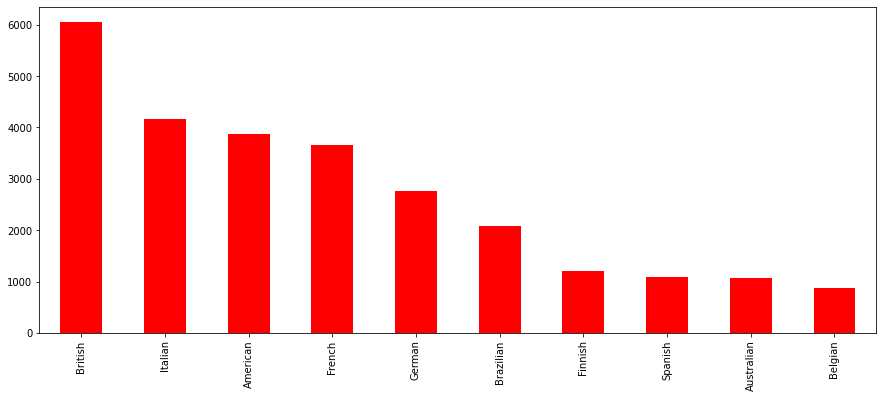

In [15]:
df_unido.Nacionalidad.value_counts().head(10).plot(kind="bar", figsize=(15,6), color="Red")

In [16]:
df_unido.Nacionalidad.value_counts().head(10)

British       6048
Italian       4164
American      3882
French        3656
German        2773
Brazilian     2080
Finnish       1214
Spanish       1096
Australian    1065
Belgian        866
Name: Nacionalidad, dtype: int64

Como ya esta cargado y unidas las dos primeras tablas procedo a incorporar otra tabla y limpiar la misma para dejar lista para aplicar algoritmos

In [17]:
df3=pd.read_csv("pit_stops.csv")
df3.head(5)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [18]:
df = pd.merge(df_unido, df3, on="driverId", how="inner")
df.sample(5)

,driverId,Numero,Codigo,Nombre,Apellido,Nacimiento,Nacionalidad,Puntos,Posicion,Victorias,raceId,stop,lap,time,duration,milliseconds
779208,17,\N,WEB,Mark,Webber,1976-08-27,Australian,199.0,3,0,891,2,29,15:00:00,23.477,23477
725159,15,\N,TRU,Jarno,Trulli,1974-07-13,Italian,4.0,10,0,854,2,19,20:43:14,33.317,33317
1697340,822,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,197.0,2,2,1110,1,6,15:15:24,23.362,23362
2347353,852,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,20.0,17,0,1117,1,9,14:16:34,30.121,30121
832173,18,22,BUT,Jenson,Button,1980-01-19,British,222.0,2,3,887,1,11,13:22:03,24.745,24745


In [19]:
del df ["raceId"]
del df ["milliseconds"]

In [20]:
resumen_pilotos = df.groupby(['Apellido']).agg({
    'Puntos': ['max'],
    'Victorias': 'sum',
    })

print(resumen_pilotos)

              Puntos Victorias
                 max       sum
Apellido                      
Aitken           0.0         0
Albon          105.0         0
Alguersuari     26.0         0
Alonso         278.0    174384
Antonelli       78.0         0
...              ...       ...
d'Ambrosio       0.0         0
de Vries         2.0         0
de la Rosa      19.0         0
di Resta        48.0         0
van der Garde    0.0         0

[78 rows x 2 columns]


In [21]:
df.dtypes

driverId          int64
Numero           object
Codigo           object
Nombre           object
Apellido         object
Nacimiento       object
Nacionalidad     object
Puntos          float64
Posicion         object
Victorias         int64
stop              int64
lap               int64
time             object
duration         object
dtype: object